In [55]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from keras.datasets import mnist
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [57]:
(trainclass, trainlabels), (testclass, testlabels) = mnist.load_data()
testclass = testclass.reshape(len(testclass),28*28)
# print(testclass.shape)
classes  = []
groundlabels = []
for i in range(10):
    temp = []
    check = []   
    for j in range(len(testlabels)):
        if(i==testlabels[j]):
            temp.append(testclass[j])
            check.append(testlabels[j])
    temp = np.array(temp)
    temp = temp[0:100,:]
    check = check[0:100]
    for m in check:
        groundlabels.append(m)
#     print(temp.shape)
    classes.append(temp)
classes = np.array(classes)
print(classes.shape)
print(groundlabels)          

(10, 100, 784)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [22]:
reducedclasses = []
for i in range(len(classes)):
    pca = PCA(n_components=2)
    x = classes[i]
    reducedclasses.append(pca.fit_transform(x))
reducedclasses = np.array(reducedclasses)
print(reducedclasses.shape)

(10, 100, 2)


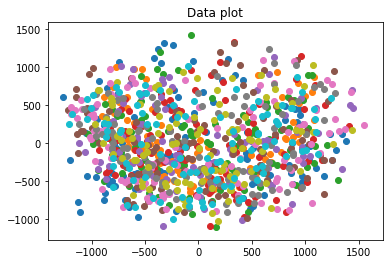

In [49]:
for i in range(len(reducedclasses)):
    plt.scatter(reducedclasses[i,:,0],reducedclasses[i,:,1])
plt.title("Data plot")
plt.show()

In [35]:
data_1 = []
for i in range(len(reducedclasses)):
    for j in range(len(reducedclasses[i])):
        data_1.append(reducedclasses[i][j])
data_1 = np.array(data_1)
print(data_1.shape)

(1000, 2)


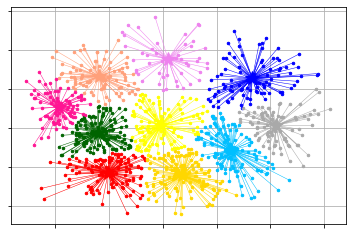

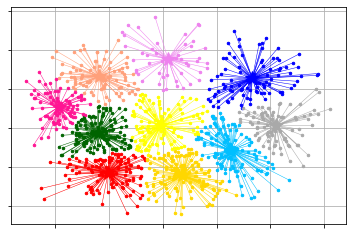

In [53]:
data_1 = list(data_1)
initial_centers = kmeans_plusplus_initializer(data_1, 10).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(data_1, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
# visualizer = cluster_visualizer_multidim()
kmeans_visualizer.show_clusters(data_1, clusters, final_centers)
# visualizer.append_clusters(clusters, data_1)
# visualizer.show()

silhouette average for initialization 1 : 0.34702770393307963
adjusted rand score : 0.006125308248018334


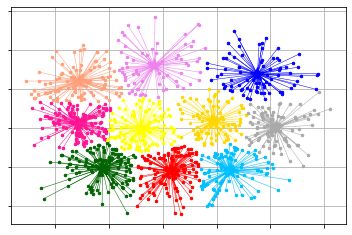

silhouette average for initialization 2 : 0.34762426175688593
adjusted rand score : 0.004924955929548295


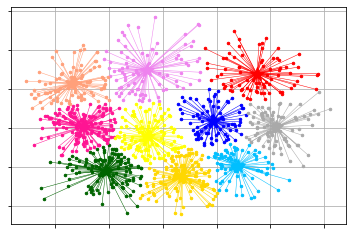

silhouette average for initialization 3 : 0.3241790260771997
adjusted rand score : 0.006801288084686829


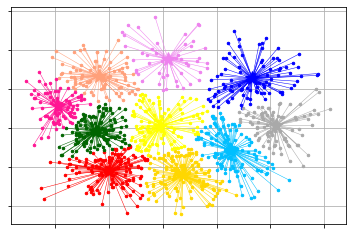

silhouette average for initialization 4 : 0.32460820121707945
adjusted rand score : 0.0030587286404035745


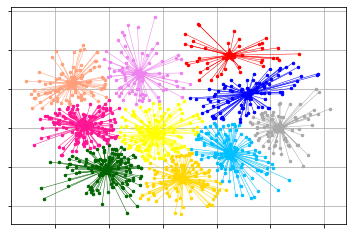

silhouette average for initialization 5 : 0.32114638930662387
adjusted rand score : 0.005567964248744011


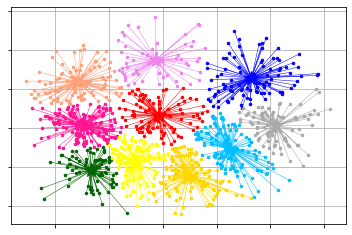

In [58]:
# 5 initialisations
for m in range(5):
    initial_centers = kmeans_plusplus_initializer(data_1, 10).initialize()

# Create instance of K-Means algorithm with prepared centers.
    kmeans_instance = kmeans(data_1, initial_centers)

    # Run cluster analysis and obtain results.
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    final_centers = kmeans_instance.get_centers()
    
    
    #silhouette scores calculation
    cluster_labels = [0 for i in range(1000)]

    for i in range(len(clusters)):
        for j in range(len(clusters[i])) :
            cluster_labels[clusters[i][j]] = i
    silhouette_avg = silhouette_score(data_1, cluster_labels)
    print('silhouette average for initialization',str(m+1),':',silhouette_avg)
    print('adjusted rand score :',adjusted_rand_score(cluster_labels,groundlabels))
    
    # Visualize obtained results
    # visualizer = cluster_visualizer_multidim()
    kmeans_visualizer.show_clusters(data_1, clusters, final_centers)
    

10


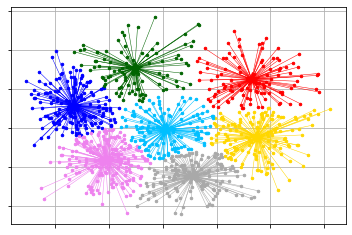

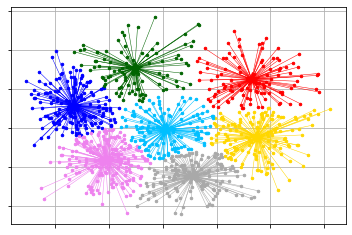

In [54]:
centeres = []
data_1 = list(data_1)
for i in range(len(reducedclasses)):
    centeres.append(sum(reducedclasses[i])/len(reducedclasses[i]))
print(len(centeres))
kmeans_instance = kmeans(data_1,centeres)
# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
# visualizer = cluster_visualizer_multidim()
kmeans_visualizer.show_clusters(data_1, clusters, final_centers)